In [168]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, auc

In [169]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/Fraud_Detection_Dataset.csv')

data checking

In [170]:
df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No
...,...,...,...,...,...,...,...,...,...,...
9995,9996,1524,1475.988992,2023-01-07 22:35:00,Clothing,Los Angeles,95.068658,414.231539,desktop,Yes
9996,9997,4879,764.834233,2023-01-07 22:36:00,Clothing,Los Angeles,902.506946,1090.687430,mobile,No
9997,9998,2624,882.096776,2023-01-07 22:37:00,Travel,New York,531.237353,186.667431,mobile,No
9998,9999,4907,1.000000,2023-01-07 22:38:00,Dining,Chicago,0.000000,116.343224,desktop,No


In [171]:
df.describe()

,Transaction ID,Customer ID,Transaction Amount,Previous Transaction Amount,Time Since Last Transaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,3010.561100,559.865608,461.410984,677.040726
std,2886.89568,1152.371939,399.984400,334.582413,432.386769
min,1.00000,1000.000000,1.000000,0.000000,1.000000
25%,2500.75000,2001.750000,262.969956,181.109688,295.523894
50%,5000.50000,3004.000000,522.370941,404.367010,653.143168
75%,7500.25000,4010.000000,788.415931,676.079655,1048.479972
max,10000.00000,4999.000000,2953.394492,1500.000000,1694.715674


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  int64  
 1   Customer ID                  10000 non-null  int64  
 2   Transaction Amount           10000 non-null  float64
 3   Transaction Date and Time    10000 non-null  object 
 4   Merchant Category            10000 non-null  object 
 5   Location                     10000 non-null  object 
 6   Previous Transaction Amount  10000 non-null  float64
 7   Time Since Last Transaction  10000 non-null  float64
 8   Device Type                  10000 non-null  object 
 9   Fraud                        10000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 781.4+ KB


In [173]:
df.isna().sum()

Transaction ID                 0
Customer ID                    0
Transaction Amount             0
Transaction Date and Time      0
Merchant Category              0
Location                       0
Previous Transaction Amount    0
Time Since Last Transaction    0
Device Type                    0
Fraud                          0
dtype: int64

EDA

In [174]:
df.head(20)

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No
5,6,2095,395.323790,2023-01-01 00:05:00,Dining,New York,421.926105,548.706785,mobile,No
6,7,4772,967.649233,2023-01-01 00:06:00,Groceries,Los Angeles,1226.767073,331.319088,desktop,No
7,8,4092,16.558875,2023-01-01 00:07:00,Dining,Chicago,78.163605,662.724041,desktop,No
8,9,2638,533.075713,2023-01-01 00:08:00,Dining,Los Angeles,553.556682,896.814583,mobile,No
9,10,3169,909.749227,2023-01-01 00:09:00,Electronics,Chicago,571.664421,505.032036,mobile,No


<Axes: xlabel='Fraud', ylabel='Transaction Amount'>

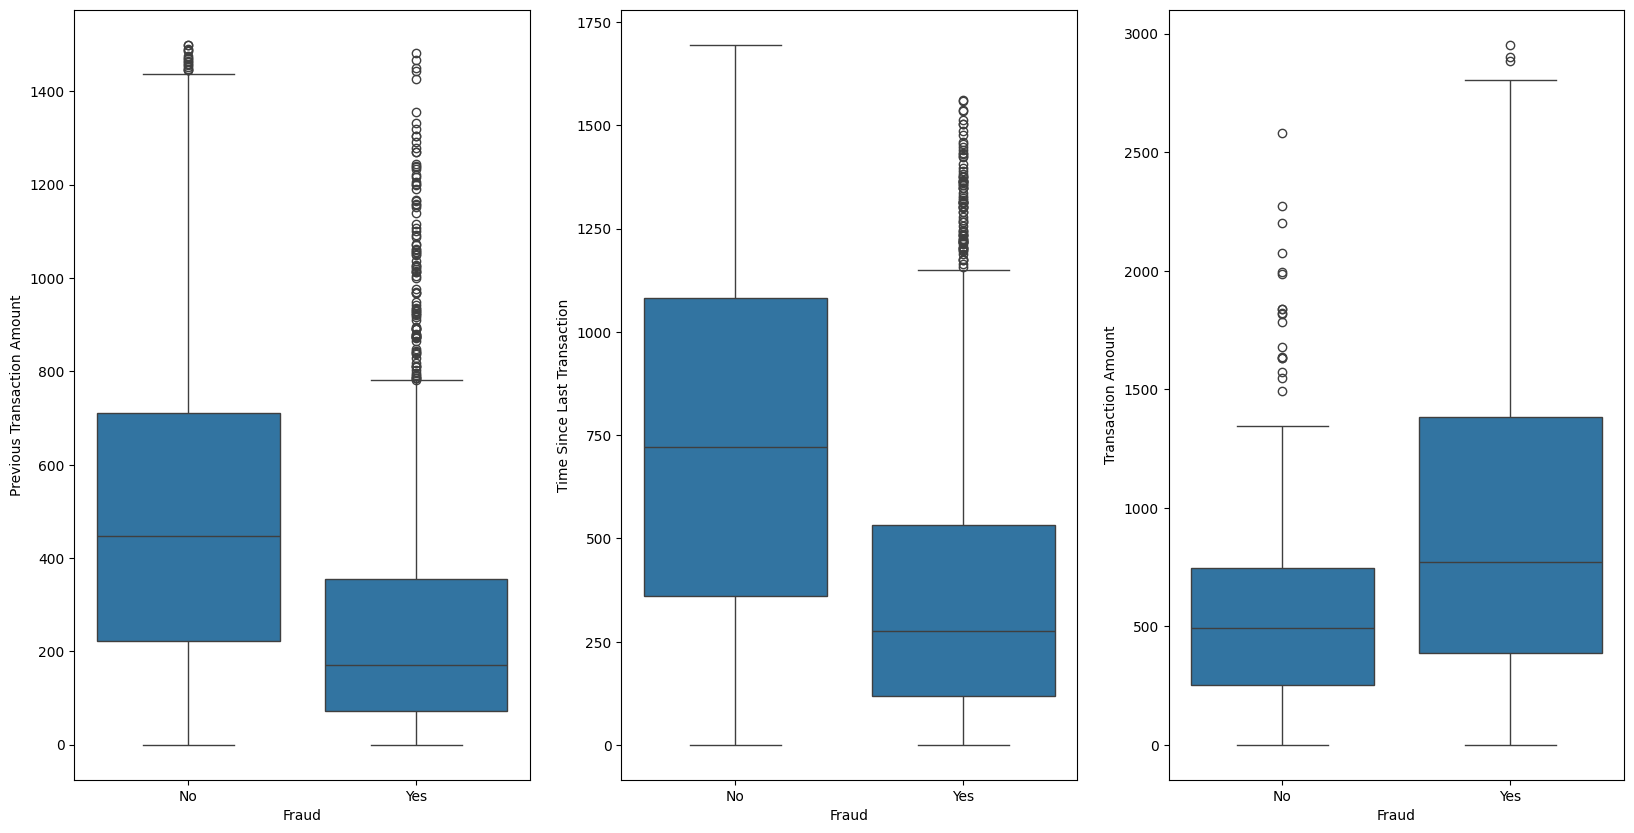

In [175]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20,10))

sns.boxplot(x='Fraud', y='Previous Transaction Amount', data=df, ax=ax1)
sns.boxplot(x='Fraud', y='Time Since Last Transaction', data=df, ax=ax2)
sns.boxplot(x='Fraud', y='Transaction Amount', data=df, ax=ax3)

In [176]:
df.groupby('Location')['Fraud'].count()

Location
Chicago          1915
Houston          2373
Los Angeles      1956
New York         1866
San Francisco    1890
Name: Fraud, dtype: int64

<Axes: xlabel='Location', ylabel='count'>

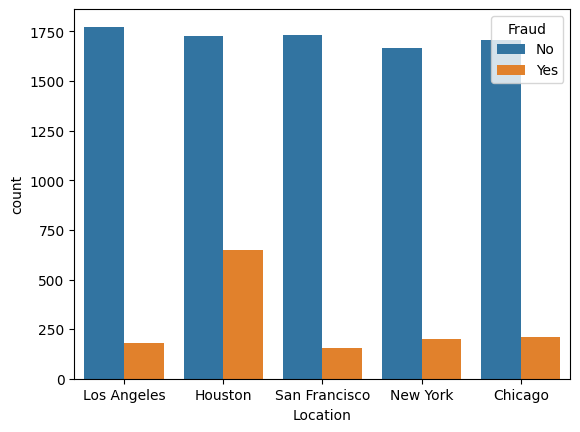

In [177]:
sns.countplot(x=df['Location'], hue=df['Fraud'])

In [178]:
df.groupby('Merchant Category')['Fraud'].count()

Merchant Category
Clothing       2052
Dining         2077
Electronics    1955
Groceries      1983
Travel         1933
Name: Fraud, dtype: int64

<Axes: xlabel='Merchant Category', ylabel='count'>

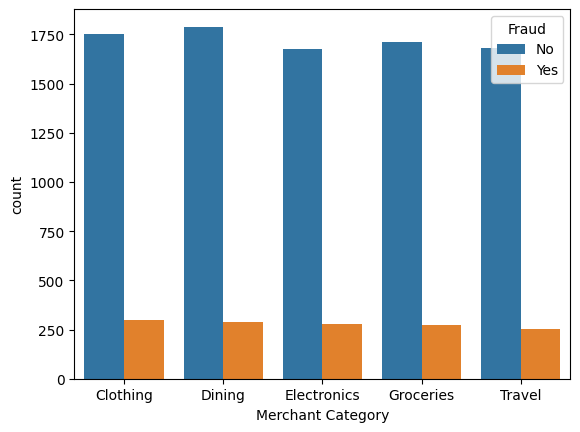

In [179]:
sns.countplot(x=df['Merchant Category'], hue=df['Fraud'])

In [180]:
df.groupby('Device Type')['Fraud'].count()

Device Type
desktop    5081
mobile     4919
Name: Fraud, dtype: int64

<Axes: xlabel='Device Type', ylabel='count'>

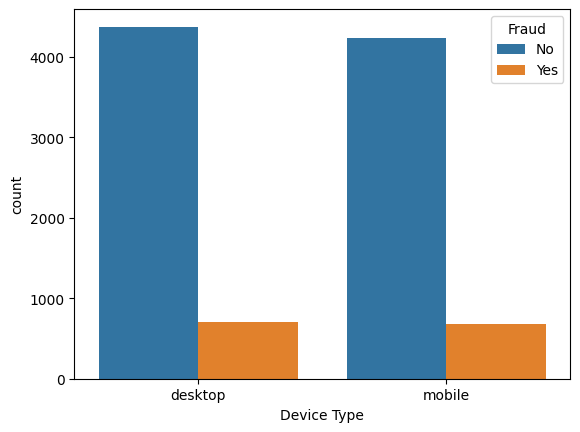

In [181]:
sns.countplot(x=df['Device Type'], hue=df['Fraud'])

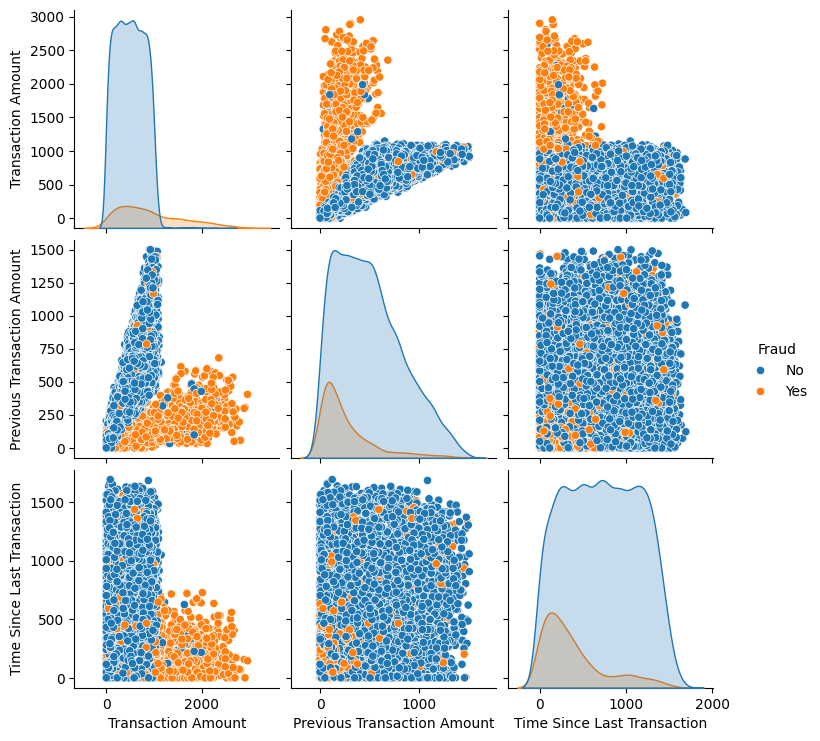

In [182]:
sns.pairplot(df.drop(columns=['Transaction ID','Customer ID']),hue='Fraud')

In [183]:
df[df['Fraud'] == 'Yes']

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
13,14,2482,856.362115,2023-01-01 00:13:00,Groceries,Houston,36.515172,170.657109,mobile,Yes
39,40,1474,1052.211001,2023-01-01 00:39:00,Electronics,Los Angeles,183.630874,535.274618,mobile,Yes
47,48,2806,338.605096,2023-01-01 00:47:00,Clothing,Chicago,292.361587,1218.527369,desktop,Yes
48,49,1189,1211.134671,2023-01-01 00:48:00,Groceries,San Francisco,336.289129,84.284262,desktop,Yes
51,52,4005,355.772351,2023-01-01 00:51:00,Groceries,Houston,147.844470,81.471113,desktop,Yes
...,...,...,...,...,...,...,...,...,...,...
9974,9975,2781,1027.524442,2023-01-07 22:14:00,Dining,Houston,128.246488,48.849829,mobile,Yes
9982,9983,4755,1219.936323,2023-01-07 22:22:00,Clothing,New York,137.483649,573.554873,desktop,Yes
9989,9990,1193,842.245668,2023-01-07 22:29:00,Electronics,San Francisco,786.116628,467.160528,desktop,Yes
9993,9994,2184,1084.260284,2023-01-07 22:33:00,Groceries,Houston,241.185853,122.790026,desktop,Yes


Hypothesis

Higher transaction amounts compared to previous transactions, with longer time durations between two transactions, that occurred in Houston have a higher chance of being classified as fraudulent transactions.

Feature Engineering

In [184]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant Category', 'Location',
       'Previous Transaction Amount', 'Time Since Last Transaction',
       'Device Type', 'Fraud'],
      dtype='object')

In [185]:
df['datetime'] = pd.to_datetime(df['Transaction Date and Time'])

In [186]:
df['hour'] = df['datetime'].apply(lambda x: x.hour)

In [187]:
def time_of_day(x):
    if  x <= 10:
        return 'morning'
    elif x > 10 and x <= 15:
        return 'midday'
    elif x > 15 and x <= 19:
        return 'aternoon'
    else:
        return 'evening'
    
df['time_of_day'] = df['hour'].apply(time_of_day)

In [188]:
df['output'] = df['Fraud'].apply(lambda x: 0 if x=='No' else 1)
df

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud,datetime,hour,time_of_day,output
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No,2023-01-01 00:00:00,0,morning,0
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No,2023-01-01 00:01:00,0,morning,0
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No,2023-01-01 00:02:00,0,morning,0
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No,2023-01-01 00:03:00,0,morning,0
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No,2023-01-01 00:04:00,0,morning,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1524,1475.988992,2023-01-07 22:35:00,Clothing,Los Angeles,95.068658,414.231539,desktop,Yes,2023-01-07 22:35:00,22,evening,1
9996,9997,4879,764.834233,2023-01-07 22:36:00,Clothing,Los Angeles,902.506946,1090.687430,mobile,No,2023-01-07 22:36:00,22,evening,0
9997,9998,2624,882.096776,2023-01-07 22:37:00,Travel,New York,531.237353,186.667431,mobile,No,2023-01-07 22:37:00,22,evening,0
9998,9999,4907,1.000000,2023-01-07 22:38:00,Dining,Chicago,0.000000,116.343224,desktop,No,2023-01-07 22:38:00,22,evening,0


In [189]:
model_df = df[['Transaction Amount','Location','Previous Transaction Amount','Time Since Last Transaction','time_of_day','output']]

In [190]:
model_data = pd.get_dummies(data = model_df, columns=['Location','time_of_day'], dtype=int)

In [191]:
model_data

,Transaction Amount,Previous Transaction Amount,Time Since Last Transaction,output,Location_Chicago,Location_Houston,Location_Los Angeles,Location_New York,Location_San Francisco,time_of_day_aternoon,time_of_day_evening,time_of_day_midday,time_of_day_morning
0,659.297095,579.323704,481.377516,0,0,0,1,0,0,0,0,0,1
1,474.046452,407.220271,1159.211075,0,0,1,0,0,0,0,0,0,1
2,498.819570,265.583605,720.677284,0,0,0,0,0,1,0,0,0,1
3,744.199592,1097.259081,1.000000,0,0,0,1,0,0,0,0,0,1
4,279.181247,238.389682,1378.958721,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1475.988992,95.068658,414.231539,1,0,0,1,0,0,0,1,0,0
9996,764.834233,902.506946,1090.687430,0,0,0,1,0,0,0,1,0,0
9997,882.096776,531.237353,186.667431,0,0,0,0,1,0,0,1,0,0
9998,1.000000,0.000000,116.343224,0,1,0,0,0,0,0,1,0,0


In [192]:
#standardize features
model_data[['Transaction Amount', 'Previous Transaction Amount','Time Since Last Transaction']]= MinMaxScaler().fit_transform(model_data[['Transaction Amount', 'Previous Transaction Amount','Time Since Last Transaction']])

<Axes: >

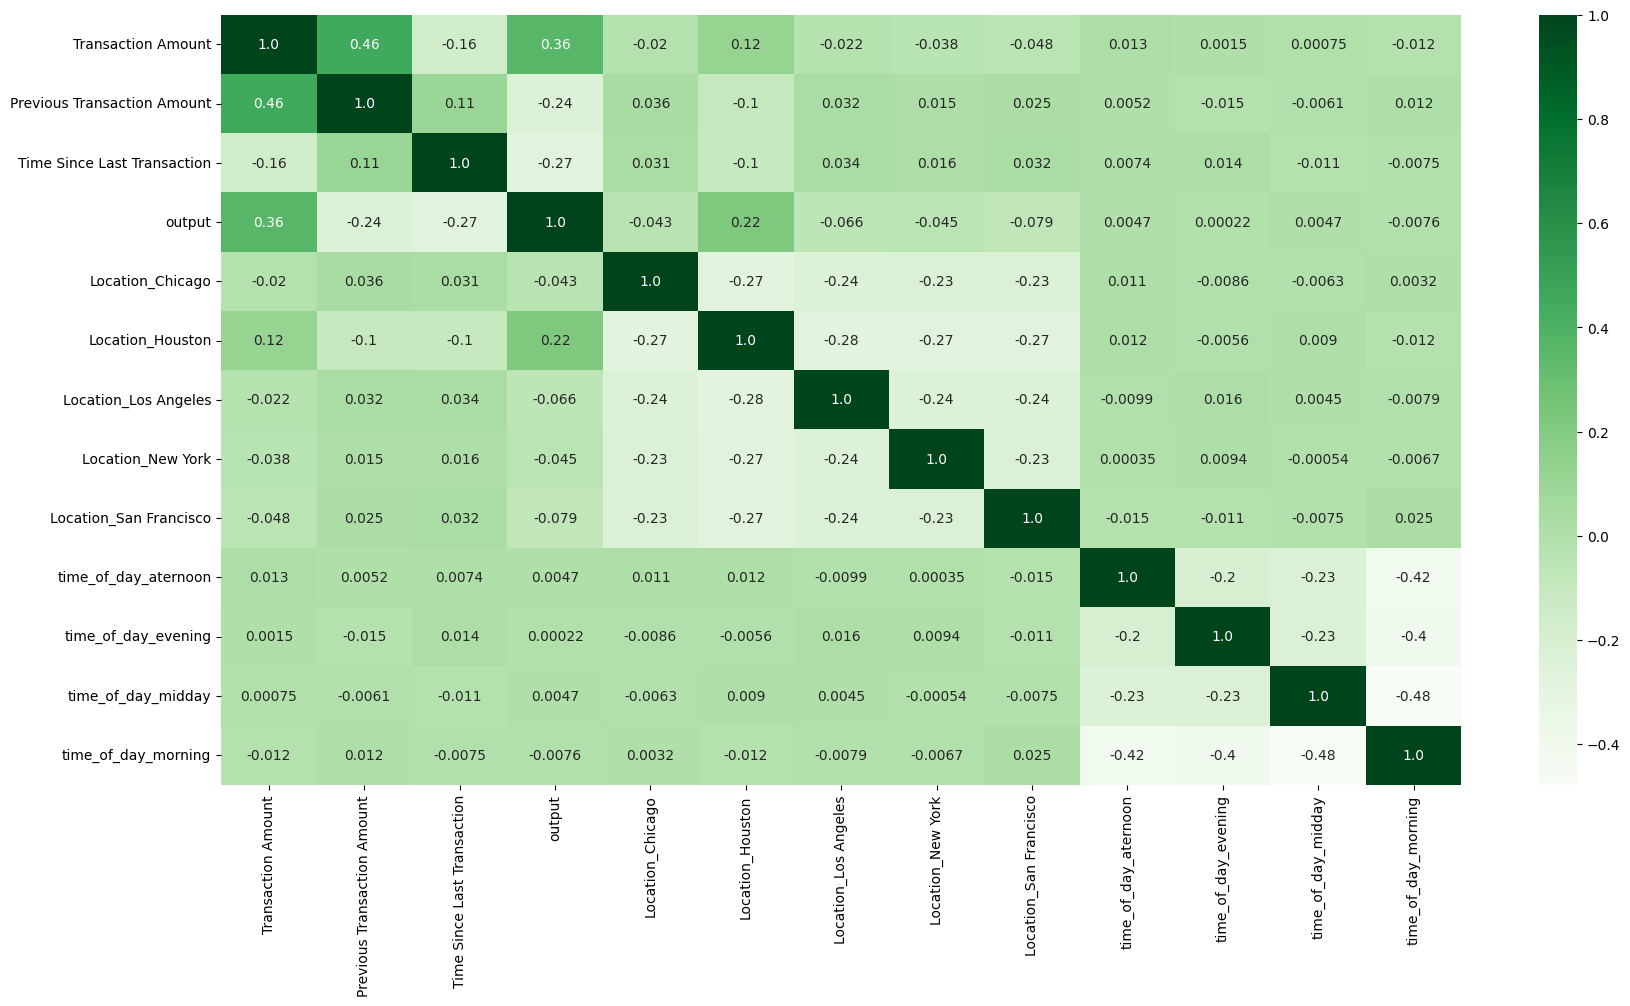

In [193]:
# visual representation of how numerical features are related to each other

cor= model_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='Greens',fmt='.2')

Modeling

In [194]:
#data imbalance
model_data['output'].value_counts()/len(model_data)

output
0    0.8608
1    0.1392
Name: count, dtype: float64

In [195]:
X = model_data.drop(columns=['output'])
y=model_data['output']

In [196]:
model_data.columns

Index(['Transaction Amount', 'Previous Transaction Amount',
       'Time Since Last Transaction', 'output', 'Location_Chicago',
       'Location_Houston', 'Location_Los Angeles', 'Location_New York',
       'Location_San Francisco', 'time_of_day_aternoon', 'time_of_day_evening',
       'time_of_day_midday', 'time_of_day_morning'],
      dtype='object')

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)

In [198]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()

In [199]:
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='f1', cv=5)
knn_scores = cross_val_score(knn, X_train, y_train, scoring= 'f1', cv=5)
nb_scores = cross_val_score(nb, X_train, y_train, scoring='f1', cv=5)
dt_scores = cross_val_score(dt,X_train, y_train, scoring='f1', cv=5)

In [200]:
print(f'Logistic Regression Mean F1 Score: {np.mean(logreg_scores)}')
print(f'K-Nearest Neighbors Mean F1 Score: {np.mean(knn_scores)}')
print(f'NB Classifier Mean F1 Score: {np.mean(nb_scores)}')
print(f'DT Classifier Mean F1 Score: {np.mean(dt_scores)}')

Logistic Regression Mean F1 Score: 0.6262772227985367
K-Nearest Neighbors Mean F1 Score: 0.6759435992995297
NB Classifier Mean F1 Score: 0.577168612767843
DT Classifier Mean F1 Score: 0.6056322663908922


In [201]:
#building an actual model
LOG = logreg.fit(X_train, y_train)
KNN = knn.fit(X_train, y_train)
NB = nb.fit(X_train, y_train)
DT = dt.fit(X_train, y_train)

#prediction y
y_pred_log = LOG.predict(X_test)
y_proba_log = LOG.predict_proba(X_test)[:, 1]

y_pred_knn=KNN.predict(X_test)
y_proba_knn = KNN.predict_proba(X_test)[:, 1]

y_pred_nb = NB.predict(X_test)
y_proba_nb = NB.predict_proba(X_test)[:, 1]

y_pred_dt = DT.predict(X_test)
y_proba_dt = DT.predict_proba(X_test)[:,1]

In [202]:
# Logreg score
print(accuracy_score(y_test, y_pred_log))
print(precision_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(recall_score(y_test, y_pred_log))

0.9223333333333333
0.9521531100478469
0.6307448494453248
0.471563981042654


In [203]:
#KNN score
print(accuracy_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn))
print(f1_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn))

0.928
0.8786764705882353
0.6887608069164265
0.566350710900474


In [204]:
#NB Score
print(accuracy_score(y_test, y_pred_nb))
print(precision_score(y_test, y_pred_nb))
print(f1_score(y_test, y_pred_nb))
print(recall_score(y_test, y_pred_nb))

0.883
0.5956873315363881
0.5573770491803278
0.523696682464455


In [205]:
print(accuracy_score(y_test, y_pred_dt))
print(precision_score(y_test, y_pred_dt))
print(f1_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))

0.879
0.5662921348314607
0.5813148788927336
0.5971563981042654


Logistic Regression ROC-AUC Score: 0.8260003529684278
KNN ROC-AUC Score: 0.8022361101408565
NB ROC-AUC Score: 0.7611460811312638


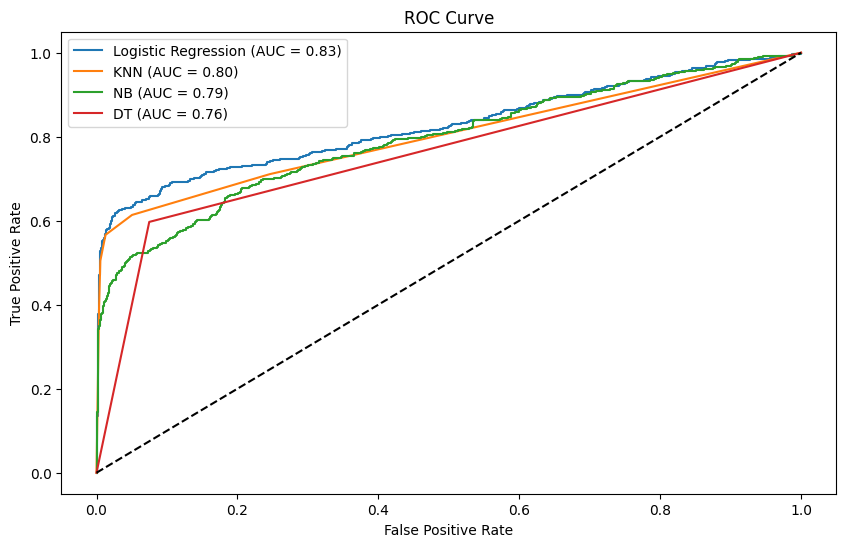

In [206]:
#Compute ROC-AUC Scores
roc_auc_log = roc_auc_score(y_test, y_proba_log)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)
roc_auc_nb = roc_auc_score(y_test, y_proba_nb)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

print("Logistic Regression ROC-AUC Score:", roc_auc_log)
print("KNN ROC-AUC Score:", roc_auc_knn)
print("NB ROC-AUC Score:", roc_auc_dt)

# Step 3: Plot ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'NB (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'DT (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<Axes: >

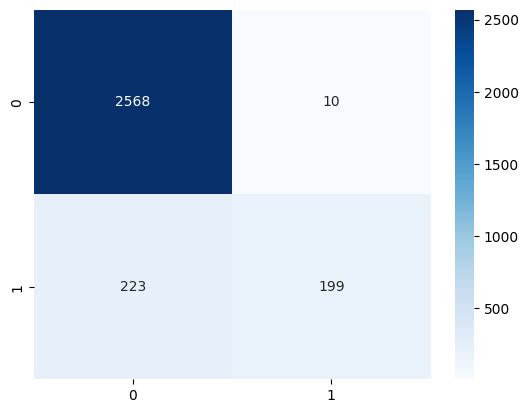

In [207]:
cm_log = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cm_log,annot=True,cmap='Blues',fmt='d')

<Axes: >

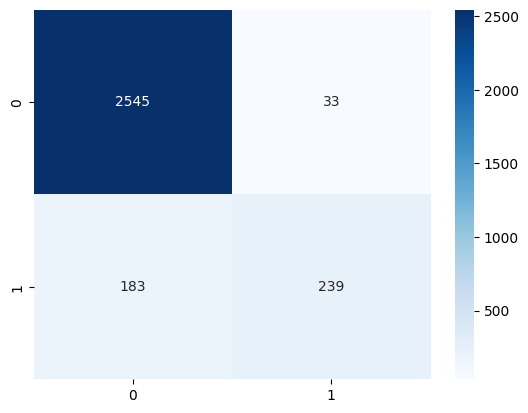

In [208]:
cm = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')

Choose logistic regression model

In [209]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [210]:
# Train the best logistic regression model
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = best_model.predict(X_test)
y_prob_logistic = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model on test data
y_test_pred = best_model.predict(X_test)
y_test_prob = best_model.predict_proba(X_test)[:, 1]

In [211]:
a=accuracy_score(y_test, y_pred_logistic)
b=precision_score(y_test, y_pred_logistic)
c=f1_score(y_test, y_pred_logistic)
d=recall_score(y_test, y_pred_logistic)

print(a,b,c,d)

0.924 0.9409090909090909 0.6448598130841121 0.490521327014218


ROC AUC: 0.8262558874030715


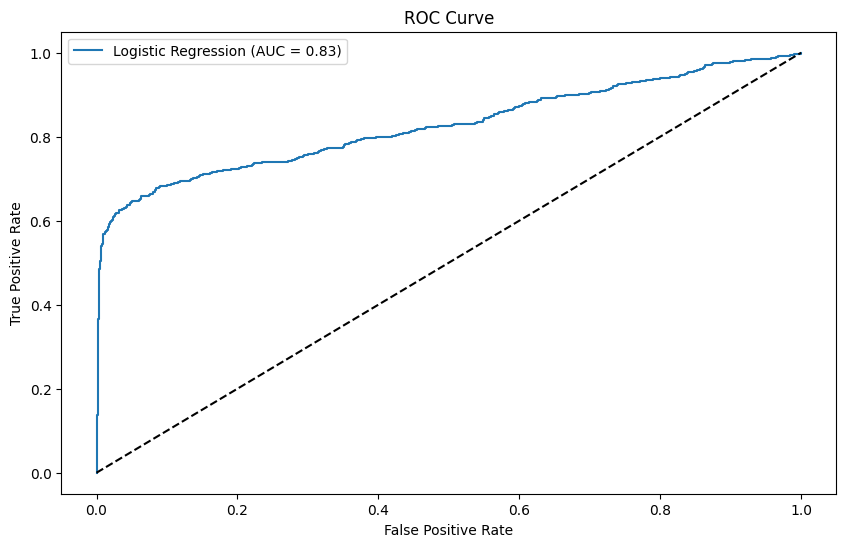

Logistic Regression Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2578
           1       0.94      0.49      0.64       422

    accuracy                           0.92      3000
   macro avg       0.93      0.74      0.80      3000
weighted avg       0.93      0.92      0.91      3000



In [212]:
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

print(f'ROC AUC: {roc_auc}')

# Plot ROC curves for training and test sets
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Print classification report for the test set
print("Logistic Regression Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

<Axes: >

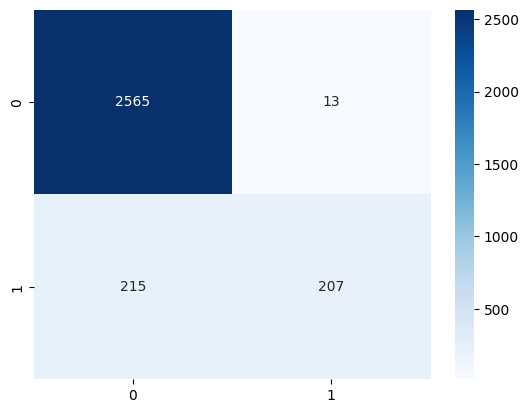

In [213]:
cm_best = confusion_matrix(y_test, y_pred_logistic)

sns.heatmap(cm_best,annot=True,cmap='Blues',fmt='d')

Explaination:

Data exploration: 

•	Based on the boxplots on the continuous variables like transaction amount, previous transactions, and time since last transactions are the features causing the transaction to be detected as fraudulent. These three can be included as the input variables in the model building.

•	Using the visualization count plot on location vs. fraud, the graph demonstrated that transactions that occurred in Houston had a higher number of fraudulent transactions than the other four locations.

•	For the other two categorical variables, merchant category and device type, there are no strong relationships between one type and the fraudulent transactions as the count numbers are distributed evenly in each category.

•	The pair plot also demonstrated there are some relationships existing among transaction amount, previous transactions, time since the last transactions and fraud.


Hypothesis: 

Higher transaction amounts compared to previous transactions, with longer time durations between two transactions, that occurred in Houston have a higher chance of being classified as fraudulent transactions.


Feature Engineering:

•	A new column called time_of_the_day is created by using the transaction date and time. Extracting the hour only from the transaction time and classify it into morning, mid day, afternoon and evening.

•	The fraud column has been transformed into 0, which means No, and 1 means Yes.

•	Get dummy was applied into the two categorical columns, location and time_of_the_day

•	Minmax scaler is applied to the transaction amount, previous transactions and time since last transaction to standardize variables between 0 and 1.


After checking the heatmap and examining the correlations between each variable, transaction amount, previous transactions and time since last transaction, and location_houston show higher correlations to the output ‘fraud’ or ‘not fraud’. This has proved that the hypothesis is true.


Modeling and evaluation:

•	Dataset is demonstrated a high imbalance between 0 and 1

•	After splitting the dataset into 70% training data and 30% of testing data, four models are chosen to predict the fraud transactions.

        o	Logistic Regression
        o	K-Nearest Neighbor
        o	Naïve Bayes
        o	Decision Tree

•	Through the result from cross-validation on F1 score, logistic and KNN show higher mean F1 scores than the rest of models.

•	Once fitting the actual models using training data and predicting using testing data, accuracy, precision, f1 and recall scores are printed. Still, logistic and KNN perform better.

•	By looking at the visualization graphs on ROC and confusion matrix, logistic regression model presents a better performance. Meanwhile, as knn model is sensitive to the imbalanced dataset, logistic model is selected as the final machine learning model to predict the fraudulent transactions.

•	Moreover, the confusion matrix based on logistic prediction it shows a lower number of transactions that are fraud but predicted as not fraud, compared to the KNN confusion matrix. This criterion is crucial for the company as they want to minimize fraudulent transactions so that their client can save money.



The company should consider applying this machine learning model to help auto-flag the highly likely fraudulent transactions to the operation analysts. For instance, it used to manually examine transactions one by one and check whether there were fraudulent transactions. Implementing the model into the process could help the company save certain labor costs. This model can help the company detect the questioning transactions and raise attention immediately. Then, the fraud analysts can only focus on checking these red-flag transactions, which improves work efficiency. At the same time, the company wants to reduce the number of legitimate transactions flagged as fraud. With the high precision score from the logistic model, fraud analysts could have more time investigating the cases that occurred in transactions that were falsely detected as fraudulent. Overall, with a small group of analysts in the team and the machine learning model, it could greatly improve work efficiency and higher precision in detecting whether the transactions are fraud.
